<a href="https://www.kaggle.com/code/sundarikonar/spaceship-titanic?scriptVersionId=117475401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


**Description**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

**Task**

Our task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly using the given set of personal records recovered from the ship's damaged computer system.

**File and Data Field Descriptions**            
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.        
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.       
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.           
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.               
Destination - The planet the passenger will be debarking to.                
Age - The age of the passenger.          
VIP - Whether the passenger has paid for special VIP service during the voyage.     
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.           
Name - The first and last names of the passenger.          
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.         

**Importing required Libraries**

In [2]:
#Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

#Ignore unwanted warning messages
import warnings
warnings.filterwarnings('ignore')

#Classification models
from sklearn.linear_model import LogisticRegression #Binary Classification
from sklearn.neighbors import KNeighborsClassifier #Distance Based algo
from sklearn.tree import DecisionTreeClassifier #
from sklearn.ensemble import RandomForestClassifier #Ensembling with multiple DT
from sklearn.svm import SVC #Mapping in higher dimension for non linear separable data 
from sklearn.naive_bayes import GaussianNB #Based on bayes theorem
from xgboost import XGBClassifier #Booster

#Hypertuning libraries
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV

#To scale the values 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

#To split our data
from sklearn.model_selection import train_test_split

In [3]:
#Loading the train file
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* As per the descrition provided the passenger and cabin holds a lot more insights about the spaceship which needs to be explored
* Dataset includes bool, object and numerical data type
* Transported is our target columns which needs to be predicted based on other independent features

In [4]:
df.info() #Information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* There are 8693 entries 
* There seems to be null values in mostly all features except for passengerID and transported
* Dataset includes One Bool feature, 6 float features and 7 object features
* Although when we observed our data.head there seems to be more then one bool value features which needs to be manually checked

In [5]:
df.isnull().sum() #Checking the null Values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

As Expected there are null values in all columns except 2 which needs to be handled before moving ahead with model building process

In [6]:
int_col=df.select_dtypes('float').columns #Extracting all numeric columns
int_col

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

**Visualising Numeric Columns**

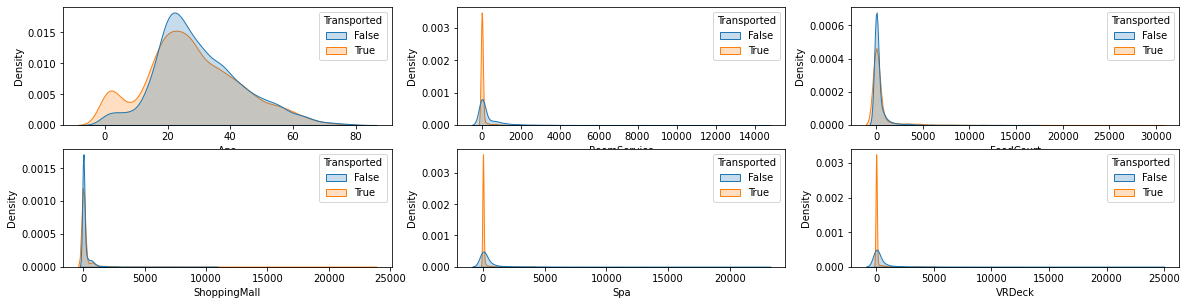

In [7]:
plt.figure(figsize=(20,10))
for i,col in enumerate(int_col):
    plt.subplot(4,3,i+1)
    sns.kdeplot(df[col],hue=df['Transported'],shade=True)
plt.show()

* Age seems to be normally distributed and also a strange observation that most between age 0-10 mostly kids that age are being transported
* Rest all the expenses made by passengers on different areas seems to be highly positive skewed wherein there might be chances of outliers which needs to be handled

**Replacing numeric null values with mean value**

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)

**Checking for mode value based on the HomePlanet feature**

In [9]:
print(df.groupby('HomePlanet')['CryoSleep'].value_counts())
print(df.groupby('HomePlanet')['Destination'].value_counts())
print(df['Cabin'].sample())

HomePlanet  CryoSleep
Earth       False        3106
            True         1382
Europa      False        1162
            True          911
Mars        False        1047
            True          669
Name: CryoSleep, dtype: int64
HomePlanet  Destination  
Earth       TRAPPIST-1e      3101
            PSO J318.5-22     712
            55 Cancri e       690
Europa      TRAPPIST-1e      1189
            55 Cancri e       886
            PSO J318.5-22      19
Mars        TRAPPIST-1e      1475
            55 Cancri e       193
            PSO J318.5-22      49
Name: Destination, dtype: int64
6323    G/1083/P
Name: Cabin, dtype: object


**Replacing object data type with mode value**

In [10]:
df['HomePlanet'].fillna('Earth',inplace=True)
df['CryoSleep'].fillna('False',inplace=True)
df['Destination'].fillna('TRAPPIST-1e',inplace=True)
df['VIP'].fillna('False',inplace=True)
df['Name'].fillna('Passenger',inplace=True)
df['Cabin'].fillna('Z/0/Z',inplace=True) #Replacing with a non existent value to differentiate the unknown values

In [11]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

No Null values anymore

**Spliting Cabin feature to extract more insights on Deck/ Number/ Side (Which side on the spaceship)**

In [12]:
x=df['Cabin'].str.split('/') #Splitting
df['Cabin_deck']=x.map(lambda x:x[0]) #Mapping each and every splited list to get the deck 
df['Cabin_num']=x.map(lambda x:x[1]) #Mapping each and every splited list to get the number 
df['Cabin_side']=x.map(lambda x:x[2]) #Mapping each and every splited list to get the Side 

**Same Splitting analysis with PassengerID column**

In [13]:
df['PassengerId'].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [14]:
x=df['PassengerId'].str.split('_')
df['PassengerGroup']=x.map(lambda x:x[0])
df['PassengerNumber']=x.map(lambda x:x[1])

In [15]:
df.head() #Checking the new feature additions with the help of df.head

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01


We can observe that there are some new features added at the end which gives us some more granular details such as which deck did the passenger travel in, or the cabin number, which side of the cabin, passenger group, how many family and how many individuals were making this trip, and so on

**Checking the distribution of amount spent**

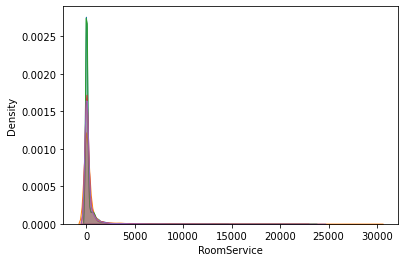

In [16]:
sns.kdeplot(df['RoomService'],shade=True)
sns.kdeplot(df['FoodCourt'],shade=True)
sns.kdeplot(df['ShoppingMall'],shade=True)
sns.kdeplot(df['Spa'],shade=True)
sns.kdeplot(df['VRDeck'],shade=True)
plt.show()

It shows high positive skewness, lets check for outliers

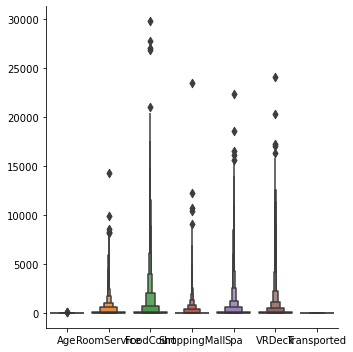

In [17]:
sns.catplot(data=df,kind='boxen')
plt.show()

As Speculated there seems to be outliers in our dataset

**Feature engineering with Amount spent column**

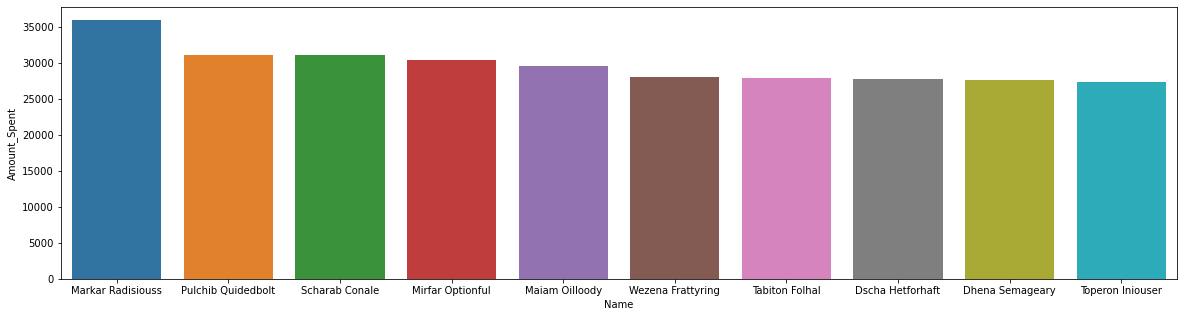

In [18]:
df['Amount_Spent']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck'] #Creating a sinple feature with 5
x=df.sort_values(by='Amount_Spent',ascending=False).head(10)['Name'] #Sorting the dataset with amount spent column
plt.figure(figsize=(20,5))
sns.barplot(x=x,y=df['Amount_Spent']) #Viusalising who spent the most amount
plt.show()

Marker Radisiouss spent the highest amount followed by Pulchid, Scharab and others 

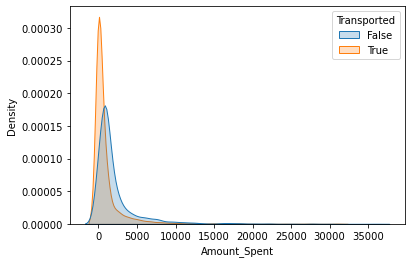

In [19]:
sns.kdeplot(df['Amount_Spent'],hue=df['Transported'],fill=True) #Checking for distribution of our new feature
plt.show()

In [20]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

**Replacing the amount spent with sqrt values to handle the skewness**

In [21]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=np.sqrt(df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

**Checking the distribution with log values**

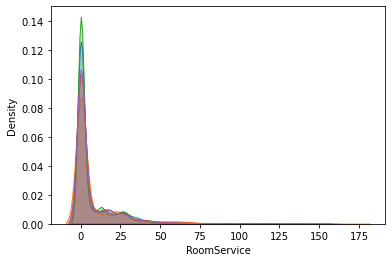

In [22]:
sns.kdeplot(df['RoomService'],shade=True)
sns.kdeplot(df['FoodCourt'],shade=True)
sns.kdeplot(df['ShoppingMall'],shade=True)
sns.kdeplot(df['Spa'],shade=True)
sns.kdeplot(df['VRDeck'],shade=True)
plt.show()

There still seems to be positive skewness but Now it looks slightly better

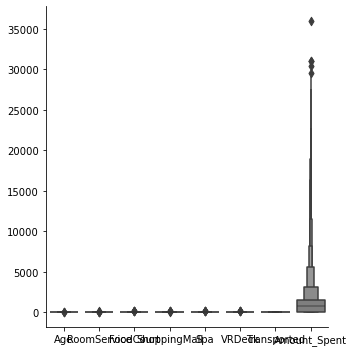

In [23]:
sns.catplot(data=df,kind='boxen') #Lets check for outliers again
plt.show()

No outliers anymore in our dataset

In [24]:
df.dtypes #Checking the datatype to ensure we convert all as Numeric data

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
Transported           bool
Cabin_deck          object
Cabin_num           object
Cabin_side          object
PassengerGroup      object
PassengerNumber     object
Amount_Spent       float64
dtype: object

In [25]:
df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber,Amount_Spent
4948,5275_01,Earth,False,F/1014/S,TRAPPIST-1e,29.0,False,0.0,3.162278,0.0,24.372115,10.954451,Jerek Buckentry,False,F,1014,S,5275,01,724.0


**Converting Bool into numeric with the help of replace function**

In [26]:
df['CryoSleep']=df['CryoSleep'].replace({'False':0,'True':1})
df['VIP']=df['VIP'].replace({'False':0,'True':1})
df['Transported']=df['Transported'].replace({'False':0,'True':1})

**Converting the replaced bool values into numeric data type**

In [27]:
df[['CryoSleep','VIP','Transported']]=df[['CryoSleep','VIP','Transported']].astype('int')
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerGroup,PassengerNumber,Amount_Spent
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.000000,0.0,0.0,0.000000,0.00000,Maham Ofracculy,0,B,0,P,0001,01,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,10.440307,3.0,5.0,23.430749,6.63325,Juanna Vines,1,F,0,S,0002,01,736.0


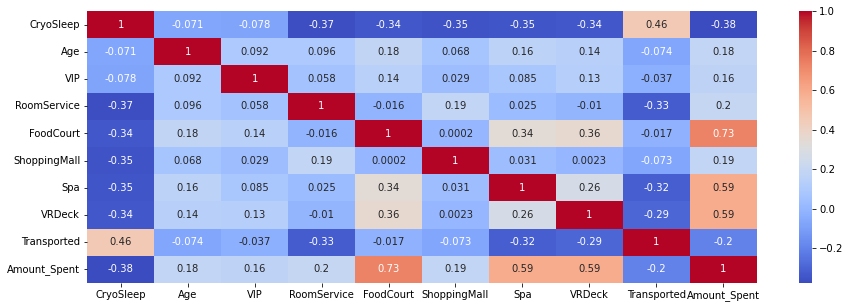

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [29]:
df.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1,inplace=True) #Dropping the 5 features which are merged as one

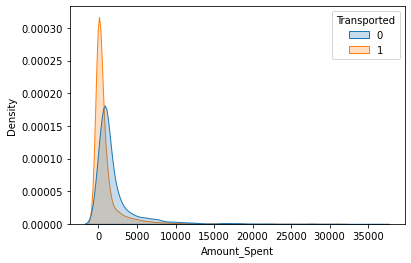

In [30]:
sns.kdeplot(df['Amount_Spent'],hue=df['Transported'],fill=True) #Checking for distribution of our new feature
plt.show()

In [31]:
#Dropping the feature as we did feature extraction and extracted the information that was needed
df.drop(['Cabin_num','Cabin','Name','PassengerGroup','PassengerId'],axis=1,inplace=True)

In [32]:
obj_col=df.columns 
obj_col=obj_col.drop(['Age','Amount_Spent']) #Extracting object columns
obj_col

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'Cabin_deck', 'Cabin_side', 'PassengerNumber'],
      dtype='object')

**Visualising categorical data**

<function matplotlib.pyplot.show(close=None, block=None)>

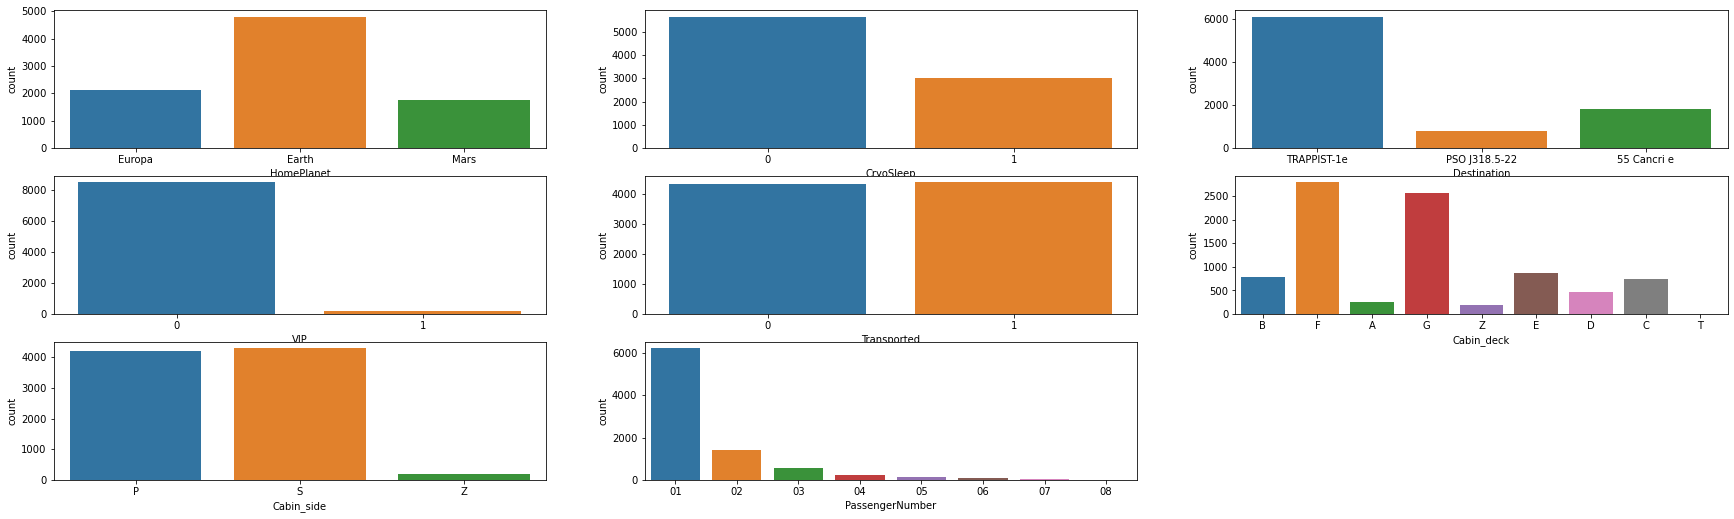

In [33]:
plt.figure(figsize=(30,30)) 
for i,col in enumerate(obj_col):
    plt.subplot(10,3,i+1)
    sns.countplot(df[col])
plt.show

* Earth contributes to the most of the passengers 
* 1/3 of the passenger are elected to put into cyrosleep
* Most passengers destination is Trappist followed by Cancri and PSO
* Very few passengers are VIP
* Our target transported column seems to be balanced
* Most Passenger are situated at F and G deck... there seems to be some order in deck which needs to be considered while encoding
* Most passengers are from S cabin side and point to note here is Z are unknown cabin side which if we use mode value comes out to be S
* Same with Cabin deck needs to be replaced with mode F 
* Passenger number indicates the count of group which shows that most passengers traveling are indiciduals followed by couples **

In [34]:
df['Cabin_deck'].replace('Z','F',inplace=True)
df['Cabin_side'].replace('Z','S',inplace=True)

**Visualising Categorical data with comparison to our target column**

<function matplotlib.pyplot.show(close=None, block=None)>

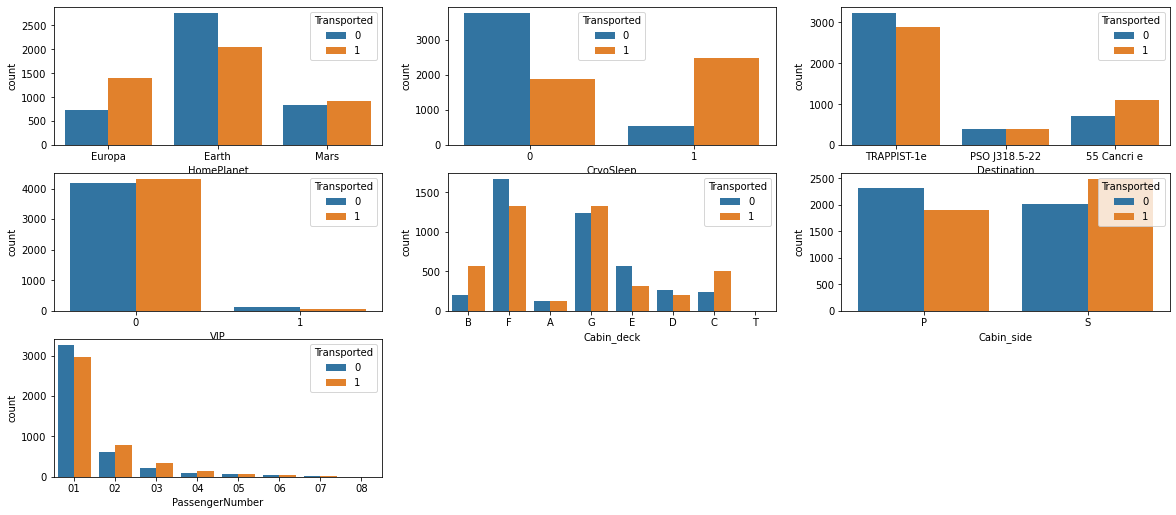

In [35]:
plt.figure(figsize=(20,30))
for i,col in enumerate(obj_col.drop('Transported')):
    plt.subplot(10,3,i+1)
    sns.countplot(df[col],hue=df['Transported'])
plt.show

In [36]:
df['Cabin_deck']=df['Cabin_deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

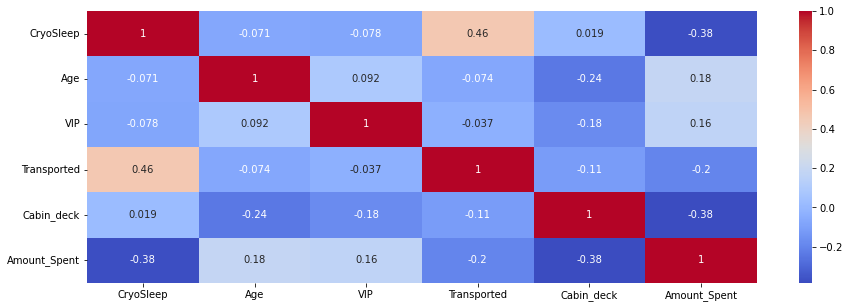

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [38]:
x=pd.get_dummies(df['HomePlanet'])
y=pd.get_dummies(df['Destination'])
a=pd.get_dummies(df['Cabin_side'])
new_df=pd.concat([df,x,y,a],axis=1)

In [39]:
new_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Cabin_deck,Cabin_side,PassengerNumber,Amount_Spent,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S
0,Europa,0,TRAPPIST-1e,39.0,0,0,2,P,01,0.0,0,1,0,0,0,1,1,0
1,Earth,0,TRAPPIST-1e,24.0,0,1,6,S,01,736.0,1,0,0,0,0,1,0,1
2,Europa,0,TRAPPIST-1e,58.0,1,0,1,S,01,10383.0,0,1,0,0,0,1,0,1
3,Europa,0,TRAPPIST-1e,33.0,0,0,1,S,02,5176.0,0,1,0,0,0,1,0,1
4,Earth,0,TRAPPIST-1e,16.0,0,1,6,S,01,1091.0,1,0,0,0,0,1,0,1


In [40]:
new_df.drop(['HomePlanet','Destination','Cabin_side'],axis=1,inplace=True)

In [41]:
print(new_df.dtypes)

CryoSleep            int64
Age                float64
VIP                  int64
Transported          int64
Cabin_deck           int64
PassengerNumber     object
Amount_Spent       float64
Earth                uint8
Europa               uint8
Mars                 uint8
55 Cancri e          uint8
PSO J318.5-22        uint8
TRAPPIST-1e          uint8
P                    uint8
S                    uint8
dtype: object


In [42]:
new_df['PassengerNumber']=new_df['PassengerNumber'].astype('int')

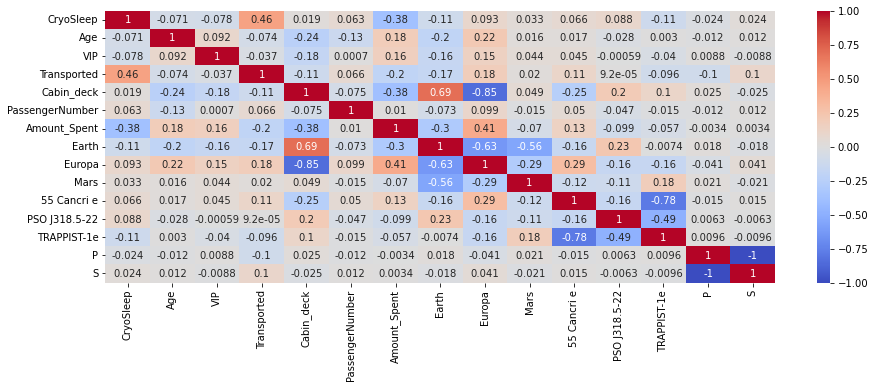

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [44]:
x=new_df.drop('Transported',axis=1)
y=new_df['Transported']
x.head()

,CryoSleep,Age,VIP,Cabin_deck,PassengerNumber,Amount_Spent,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S
0,0,39.0,0,2,1,0.0,0,1,0,0,0,1,1,0
1,0,24.0,0,6,1,736.0,1,0,0,0,0,1,0,1
2,0,58.0,1,1,1,10383.0,0,1,0,0,0,1,0,1
3,0,33.0,0,1,2,5176.0,0,1,0,0,0,1,0,1
4,0,16.0,0,6,1,1091.0,1,0,0,0,0,1,0,1


In [45]:
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])
x.head(2)

,CryoSleep,Age,VIP,Cabin_deck,PassengerNumber,Amount_Spent,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S
0,-0.73277,0.709437,-0.153063,-1.886321,-0.491161,-0.525934,-1.111173,1.754795,-0.503664,-0.511013,-0.317487,0.652521,1.032865,-1.032865
1,-0.73277,-0.336717,-0.153063,0.385470,-0.491161,-0.263054,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521,-0.968181,0.968181


In [46]:
x.isnull().sum()

CryoSleep          0
Age                0
VIP                0
Cabin_deck         0
PassengerNumber    0
Amount_Spent       0
Earth              0
Europa             0
Mars               0
55 Cancri e        0
PSO J318.5-22      0
TRAPPIST-1e        0
P                  0
S                  0
dtype: int64

In [47]:
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.25)

In [49]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    trs=model.score(xtrain,ytrain)
    tes=model.score(xtest,ytest)
    
    ac=accuracy_score(ytest,ypred)
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    fpr,tpr,threshold=roc_curve(ytest,ypred)
    roc_auc=roc_auc_score(ytest,ypred)
    plt.plot(fpr,tpr,label=model)
    
    print(f'Model:{model}\nTraining Score: {trs}\nTesting Score: {tes}\nConfusion Matrix: \n{cm}\
    \nClassification_report\n{cr}\nAccuracy Score: {ac}\nROC_AUC_Score: {roc_auc}\nFalsePositiveRate: {fpr}')
    print()
    print()
    return model

Model:LogisticRegression()
Training Score: 0.7289461573861021
Testing Score: 0.7235510579576817
Confusion Matrix: 
[[859 213]
 [388 714]]    
Classification_report
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1072
           1       0.77      0.65      0.70      1102

    accuracy                           0.72      2174
   macro avg       0.73      0.72      0.72      2174
weighted avg       0.73      0.72      0.72      2174

Accuracy Score: 0.7235510579576817
ROC_AUC_Score: 0.7246094279058429
FalsePositiveRate: [0.         0.19869403 1.        ]


Model:KNeighborsClassifier()
Training Score: 0.7927596257094647
Testing Score: 0.703771849126035
Confusion Matrix: 
[[789 283]
 [361 741]]    
Classification_report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1072
           1       0.72      0.67      0.70      1102

    accuracy                           0.70      2174
 

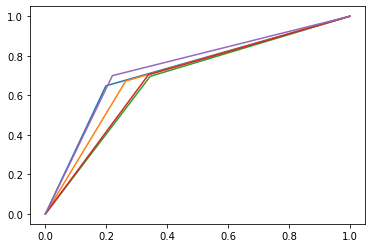

In [50]:
LogR=mymodel(LogisticRegression())
KNN=mymodel(KNeighborsClassifier())
DTC=mymodel(DecisionTreeClassifier())
RFC=mymodel(DecisionTreeClassifier())
XGB=mymodel(XGBClassifier())

In [51]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x.iloc[:,:]=mm.fit_transform(x.iloc[:,:])
x.head(2)

,CryoSleep,Age,VIP,Cabin_deck,PassengerNumber,Amount_Spent,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S
0,0.0,0.493671,0.0,0.142857,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.303797,0.0,0.714286,0.0,0.020452,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Model:LogisticRegression()
Training Score: 0.7343974690825424
Testing Score: 0.7084531339850488
Confusion Matrix: 
[[678 160]
 [347 554]]    
Classification_report
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       838
           1       0.78      0.61      0.69       901

    accuracy                           0.71      1739
   macro avg       0.72      0.71      0.71      1739
weighted avg       0.72      0.71      0.71      1739

Accuracy Score: 0.7084531339850488
ROC_AUC_Score: 0.7119707882252284
FalsePositiveRate: [0.         0.19093079 1.        ]


Model:KNeighborsClassifier()
Training Score: 0.7963761863675582
Testing Score: 0.6998274870615296
Confusion Matrix: 
[[645 193]
 [329 572]]    
Classification_report
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       838
           1       0.75      0.63      0.69       901

    accuracy                           0.70      1739


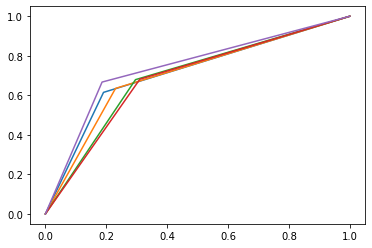

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=300,test_size=0.20)

LogR=mymodel(LogisticRegression())
KNN=mymodel(KNeighborsClassifier())
DTC=mymodel(DecisionTreeClassifier())
RFC=mymodel(DecisionTreeClassifier())
XGB=mymodel(XGBClassifier())


Model:GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 30)})
Training Score: 0.7502157031924073
Testing Score: 0.7222541690626797
Confusion Matrix: 
[[707 131]
 [352 549]]    
Classification_report
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       838
           1       0.81      0.61      0.69       901

    accuracy                           0.72      1739
   macro avg       0.74      0.73      0.72      1739
weighted avg       0.74      0.72      0.72      1739

Accuracy Score: 0.7222541690626797
ROC_AUC_Score: 0.7264991960669529
FalsePositiveRate: [0.         0.15632458 1.        ]




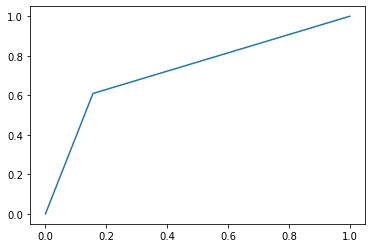

In [53]:
parameters={'n_neighbors':range(5,30)}
KNN=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
knn=mymodel(KNN)

In [54]:
x=new_df.drop('Transported',axis=1)
y=new_df['Transported']
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=400,test_size=0.25)

Model:KNeighborsClassifier(n_neighbors=30)
Training Score: 0.7430587513422304
Testing Score: 0.7405703771849126
Confusion Matrix: 
[[908 146]
 [418 702]]    
Classification_report
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1054
           1       0.83      0.63      0.71      1120

    accuracy                           0.74      2174
   macro avg       0.76      0.74      0.74      2174
weighted avg       0.76      0.74      0.74      2174

Accuracy Score: 0.7405703771849126
ROC_AUC_Score: 0.7441328950935212
FalsePositiveRate: [0.         0.13851992 1.        ]




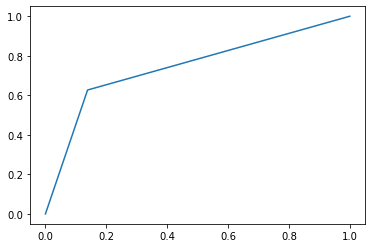

In [55]:
from sklearn.decomposition import PCA
pc=PCA(n_components=8,random_state=200)
xtrain_pca=pc.fit_transform(xtrain)
xtest_pca=pc.transform(xtest)
pca=mymodel(KNeighborsClassifier(n_neighbors=30))

Model:AdaBoostClassifier()
Training Score: 0.7349286700414174
Testing Score: 0.735510579576817
Confusion Matrix: 
[[885 169]
 [406 714]]    
Classification_report
              precision    recall  f1-score   support

           0       0.69      0.84      0.75      1054
           1       0.81      0.64      0.71      1120

    accuracy                           0.74      2174
   macro avg       0.75      0.74      0.73      2174
weighted avg       0.75      0.74      0.73      2174

Accuracy Score: 0.735510579576817
ROC_AUC_Score: 0.7385792220113852
FalsePositiveRate: [0.         0.16034156 1.        ]




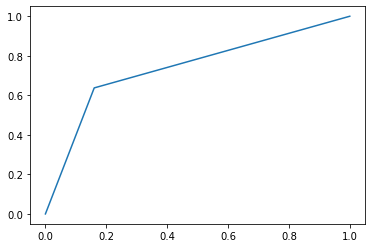

In [56]:
from sklearn.ensemble import AdaBoostClassifier
pc=PCA(n_components=8,random_state=200)
xtrain=pc.fit_transform(xtrain)
xtest=pc.transform(xtest)
pca=mymodel(AdaBoostClassifier())

# Thankyou :)